In [1]:
# Zepto-Style Real-Time Delivery Optimization Project

In [ ]:
## 1. Introduction

# Problem Statement
In the competitive world of quick-commerce, companies like Zepto promise delivery within 10 minutes.
However, maintaining such fast delivery times consistently requires optimized logistics, reliable agents, and data-driven decision-making.
In this project, we aim to analyze and optimize delivery performance using real-world-style simulated data for a Zepto-like grocery delivery platform.
                                                                                                                                                                                                                                                                                                                                                          
# The goal is to:
-> Identify patterns behind late deliveries
-> Evaluate delivery agent performance
-> Understand zone-level challenges
-> Examine external factors like weather
-> Help the business make operational improvements

 # Tools Used
This project was carried out using:
=> Python (pandas, numpy, matplotlib, seaborn)
=> SQL (for data extraction and transformations)
=> Power BI (for final dashboard & storytelling)

Python is used for data cleaning, transformation, and in-depth analysis. 
SQL is used for structured data querying and performance optimization.
Power BI is used to present key business insights visually.

# Datasets Description
We simulate realistic data resembling Zepto’s delivery model. The datasets include:
>> 'orders.csv': Contains all customer orders with timestamps, delivery status, and delivery agent info
>> 'deliveries.csv': Contains pickup and drop times, delivery delays, and weather conditions
>> 'customers.csv': Contains customer details, location, and loyalty scores
>> 'agents.csv': Contains agent details, ratings, and assigned zones

In [1]:
## 2. Import Libraries and Load Data
import pandas as pd 

orders=pd.read_csv('orders.csv',parse_dates=['order_time','delivery_time'])
deliveries=pd.read_csv('deliveries.csv',parse_dates=['pickup_time','drop_time'])
customers=pd.read_csv('customers.csv',parse_dates=['signup_date'])
agents=pd.read_csv('agents.csv')

In [2]:
## 3. Basic Data Exploration

In [3]:
# 3.1 CHECKING SHAPE AND PREVIEW FOR ALL DATAFRAMES  

In [5]:
print('orders')
print(orders.shape)
print(orders.head())
print(orders.tail())

orders
(50000, 9)
   order_id customer_id delivery_agent_id          order_time  \
0  ORD00001    CUST3366          AGNT0308 2024-04-13 22:04:00   
1  ORD00002    CUST1883          AGNT0194 2024-10-07 16:26:00   
2  ORD00003    CUST4132          AGNT0351 2024-11-01 16:26:00   
3  ORD00004    CUST4914          AGNT0020 2024-03-26 13:44:00   
4  ORD00005    CUST4277          AGNT0216 2024-09-26 16:48:00   

            delivery_time  delay_minutes     zone weather_condition     status  
0 2024-04-13 22:21:51.000           7.85  Central             Rainy  Delivered  
1 2024-10-07 16:40:27.600           4.46    South             Clear  Delivered  
2 2024-11-01 16:41:16.200           5.27    South            Stormy  Delivered  
3 2024-03-26 14:02:37.800           8.63    North             Foggy  Delivered  
4 2024-09-26 17:05:06.600           7.11    North            Stormy  Delivered  
       order_id customer_id delivery_agent_id          order_time  \
49995  ORD49996    CUST1294         

In [11]:
print('deliveries')
print(deliveries.shape)
print(deliveries.head())
print(deliveries.tail())

deliveries
(50000, 5)
   order_id         pickup_time               drop_time  \
0  ORD00001 2024-04-13 22:06:00 2024-04-13 22:21:51.000   
1  ORD00002 2024-10-07 16:28:00 2024-10-07 16:40:27.600   
2  ORD00003 2024-11-01 16:28:00 2024-11-01 16:41:16.200   
3  ORD00004 2024-03-26 13:46:00 2024-03-26 14:02:37.800   
4  ORD00005 2024-09-26 16:50:00 2024-09-26 17:05:06.600   

   actual_duration_minutes  is_late  
0                    15.85        0  
1                    12.46        0  
2                    13.27        0  
3                    16.63        0  
4                    15.11        0  
       order_id         pickup_time               drop_time  \
49995  ORD49996 2024-10-11 12:36:00 2024-10-11 12:53:36.000   
49996  ORD49997 2024-03-30 05:51:00 2024-03-30 06:04:21.000   
49997  ORD49998 2024-02-08 01:49:00 2024-02-08 02:05:05.400   
49998  ORD49999 2024-08-27 02:42:00 2024-08-27 02:56:53.400   
49999  ORD50000 2024-09-03 03:04:00 2024-09-03 03:20:21.600   

       actual_du

In [13]:
print('customers')
print(customers.shape)
print(customers.head())
print(customers.tail())

customers
(5000, 4)
  customer_id location  loyalty_score signup_date
0    CUST0001     West             30  2020-08-16
1    CUST0002  Central             23  2020-02-21
2    CUST0003     East             16  2021-07-17
3    CUST0004  Central             14  2021-05-16
4    CUST0005  Central             74  2021-04-02
     customer_id location  loyalty_score signup_date
4995    CUST4996     West             96  2023-05-27
4996    CUST4997     West             53  2022-08-23
4997    CUST4998  Central             56  2022-09-13
4998    CUST4999     West             59  2020-12-15
4999    CUST5000  Central             70  2021-03-25


In [15]:
print('agents')
print(agents.shape)
print(agents.head())
print(agents.tail())

agents
(500, 4)
   agent_id assigned_zone  on_time_pct  rating
0  AGNT0001          West        77.32    3.06
1  AGNT0002         South        94.06    4.74
2  AGNT0003       Central        90.41    3.28
3  AGNT0004       Central        97.42    3.25
4  AGNT0005          East        81.86    3.35
     agent_id assigned_zone  on_time_pct  rating
495  AGNT0496         South        71.19    4.61
496  AGNT0497       Central        90.45    4.32
497  AGNT0498         North        83.08    3.80
498  AGNT0499          West        72.92    4.03
499  AGNT0500         North        90.52    4.61


In [17]:
# Checking Column Names and Data Types

In [19]:
orders.info()
deliveries.info()
customers.info()
agents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           50000 non-null  object        
 1   customer_id        50000 non-null  object        
 2   delivery_agent_id  50000 non-null  object        
 3   order_time         50000 non-null  datetime64[ns]
 4   delivery_time      50000 non-null  datetime64[ns]
 5   delay_minutes      50000 non-null  float64       
 6   zone               50000 non-null  object        
 7   weather_condition  50000 non-null  object        
 8   status             50000 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -

In [21]:
# 3.2  Checking for Null/Missing Values

In [23]:
orders.isnull().sum()

order_id             0
customer_id          0
delivery_agent_id    0
order_time           0
delivery_time        0
delay_minutes        0
zone                 0
weather_condition    0
status               0
dtype: int64

In [25]:
deliveries.isnull().sum()

order_id                   0
pickup_time                0
drop_time                  0
actual_duration_minutes    0
is_late                    0
dtype: int64

In [27]:
customers.isnull().sum()

customer_id      0
location         0
loyalty_score    0
signup_date      0
dtype: int64

In [29]:
agents.isnull().sum()

agent_id         0
assigned_zone    0
on_time_pct      0
rating           0
dtype: int64

In [31]:
# 3.3 checking for columns names

In [33]:
print('orders=',orders.columns)
print('deliveries=',deliveries.columns)
print('customers=',customers.columns)
print('agents=',agents.columns)

orders= Index(['order_id', 'customer_id', 'delivery_agent_id', 'order_time',
       'delivery_time', 'delay_minutes', 'zone', 'weather_condition',
       'status'],
      dtype='object')
deliveries= Index(['order_id', 'pickup_time', 'drop_time', 'actual_duration_minutes',
       'is_late'],
      dtype='object')
customers= Index(['customer_id', 'location', 'loyalty_score', 'signup_date'], dtype='object')
agents= Index(['agent_id', 'assigned_zone', 'on_time_pct', 'rating'], dtype='object')


In [35]:
# 3.4 Descriptive Statistics (for numeric columns)

In [37]:
orders.describe()

,order_time,delivery_time,delay_minutes
count,50000,50000,50000.000000
mean,2024-07-01 18:23:07.384800256,2024-07-01 18:38:11.814768128,5.073833
min,2024-01-01 00:01:00,2024-01-01 00:17:00,0.000000
25%,2024-04-01 11:02:45,2024-04-01 11:16:01.950000128,2.960000
50%,2024-07-02 12:26:30,2024-07-02 12:39:42.600000,5.010000
75%,2024-09-30 23:50:45,2024-10-01 00:06:19.350000128,7.050000
max,2024-12-30 23:57:00,2024-12-31 00:13:34.800000,17.900000
std,NaN,NaN,2.883451


In [39]:
customers.describe()

,loyalty_score,signup_date
count,5000.00000,5000
mean,50.70300,2021-10-16 09:03:44.640000
min,1.00000,2020-01-01 00:00:00
25%,25.00000,2020-11-20 00:00:00
50%,51.00000,2021-10-16 12:00:00
75%,76.00000,2022-09-03 00:00:00
max,100.00000,2023-07-24 00:00:00
std,28.74151,NaN


In [41]:
agents.describe()

,on_time_pct,rating
count,500.000000,500.000000
mean,84.043840,3.974760
std,8.357816,0.574218
min,70.020000,3.000000
25%,76.670000,3.480000
50%,84.080000,3.940000
75%,91.037500,4.460000
max,98.930000,4.990000


In [43]:
deliveries.describe()

,pickup_time,drop_time,actual_duration_minutes,is_late
count,50000,50000,50000.000000,50000.000000
mean,2024-07-01 18:25:07.384800,2024-07-01 18:38:11.814768128,13.073833,0.049040
min,2024-01-01 00:03:00,2024-01-01 00:17:00,8.000000,0.000000
25%,2024-04-01 11:04:45,2024-04-01 11:16:01.950000128,10.960000,0.000000
50%,2024-07-02 12:28:30,2024-07-02 12:39:42.600000,13.010000,0.000000
75%,2024-09-30 23:52:45,2024-10-01 00:06:19.350000128,15.050000,0.000000
max,2024-12-30 23:59:00,2024-12-31 00:13:34.800000,25.900000,1.000000
std,NaN,NaN,2.883451,0.215954


In [45]:
# 3.5 checking for duplicate values

In [47]:
print('orders=',orders.duplicated().sum())
print('deliveries=',deliveries.duplicated().sum())
print('customers=',customers.duplicated().sum())
print('agents=',agents.duplicated().sum())

orders= 0
deliveries= 0
customers= 0
agents= 0


In [49]:
# 3.6 Check Unique Values in Categorical Columns

In [51]:
print('unique customer_id=',orders['customer_id'].nunique()) 
print('unique order_id=',deliveries['order_id'].nunique())
print('count of order_status=',orders['status'].value_counts())
print('unique cities=',customers['location'].unique())
print('unique agent_id=',agents['agent_id'].nunique())

unique customer_id= 5000
unique order_id= 50000
count of order_status= status
Delivered    50000
Name: count, dtype: int64
unique cities= ['West' 'Central' 'East' 'South' 'North']
unique agent_id= 500


In [ ]:
## 4. Deep-Dive Analysis

### 4.1 Delivery Time Performance Analysis

# Business Question:
How efficient are our deliveries, and are there any clear delays?

# Goal:
find top 10 longest and shortest deliveries.
Summarize delivery efficiency through simple metrics and one clean visual.

#Tools:
pandas, seaborn

In [55]:
print(deliveries['actual_duration_minutes'].describe())

count    50000.000000
mean        13.073833
std          2.883451
min          8.000000
25%         10.960000
50%         13.010000
75%         15.050000
max         25.900000
Name: actual_duration_minutes, dtype: float64


In [57]:
# Top 10 Longest Deliveries
longest = deliveries.sort_values('actual_duration_minutes', ascending=False).head(10)
longest

,order_id,pickup_time,drop_time,actual_duration_minutes,is_late
27240,ORD27241,2024-08-24 05:41:00,2024-08-24 06:06:54.000,25.90,1
26464,ORD26465,2024-01-30 09:00:00,2024-01-30 09:25:03.000,25.05,1
14045,ORD14046,2024-07-26 06:14:00,2024-07-26 06:38:25.200,24.42,1
8641,ORD08642,2024-08-04 08:51:00,2024-08-04 09:15:19.800,24.33,1
15666,ORD15667,2024-12-16 20:33:00,2024-12-16 20:57:03.600,24.06,1
9929,ORD09930,2024-03-16 20:28:00,2024-03-16 20:51:40.200,23.67,1
2133,ORD02134,2024-12-11 18:26:00,2024-12-11 18:49:37.800,23.63,1
8772,ORD08773,2024-09-01 22:20:00,2024-09-01 22:43:32.400,23.54,1
17679,ORD17680,2024-06-21 06:04:00,2024-06-21 06:27:31.200,23.52,1
8069,ORD08070,2024-10-24 01:09:00,2024-10-24 01:32:28.200,23.47,1


In [59]:
# Top 10 fastest Deliveries
shortest = deliveries.sort_values('actual_duration_minutes', ascending=True).head(10)
shortest

,order_id,pickup_time,drop_time,actual_duration_minutes,is_late
25097,ORD25098,2024-07-19 01:45:00,2024-07-19 01:53:00,8.0,0
25872,ORD25873,2024-04-17 10:28:00,2024-04-17 10:36:00,8.0,0
25861,ORD25862,2024-04-26 03:26:00,2024-04-26 03:34:00,8.0,0
25845,ORD25846,2024-07-31 07:55:00,2024-07-31 08:03:00,8.0,0
4242,ORD04243,2024-01-10 11:25:00,2024-01-10 11:33:00,8.0,0
25833,ORD25834,2024-09-30 08:04:00,2024-09-30 08:12:00,8.0,0
44531,ORD44532,2024-01-19 21:31:00,2024-01-19 21:39:00,8.0,0
25818,ORD25819,2024-07-14 04:44:00,2024-07-14 04:52:00,8.0,0
25786,ORD25787,2024-09-05 01:13:00,2024-09-05 01:21:00,8.0,0
44542,ORD44543,2024-09-21 16:13:00,2024-09-21 16:21:00,8.0,0


In [61]:
# Label fast, normal, and slow deliveries
def label_duration(x):
    if x < 11:
        return 'Fast'
    elif x < 15:
        return 'Normal'
    else:
        return 'Slow'

deliveries['duration_category'] = deliveries['actual_duration_minutes'].apply(label_duration)
print(deliveries['duration_category'].value_counts())

duration_category
Normal    24497
Slow      12810
Fast      12693
Name: count, dtype: int64


In [63]:
# Calculate Overall Average Delivery Duration
overall_avg_duration=deliveries['actual_duration_minutes'].mean()
print(f"overall average delivery duration is {overall_avg_duration:.2f} minutes")

overall average delivery duration is 13.07 minutes


In [65]:
# Count of On-Time vs. Late Deliveries
on_time_counts = deliveries['is_late'].value_counts()
print("On-Time vs Late Delivery Count:")
print(on_time_counts)

On-Time vs Late Delivery Count:
is_late
0    47548
1     2452
Name: count, dtype: int64


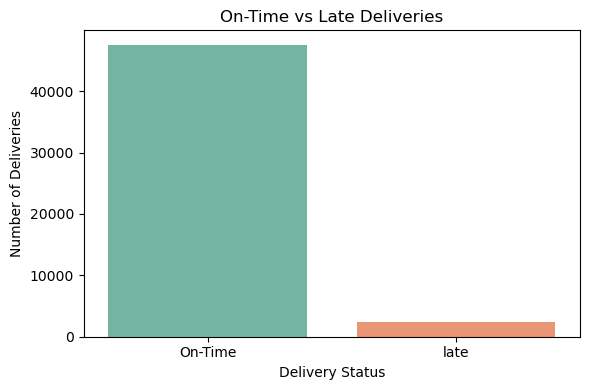

In [67]:
# Visualization — On-Time vs Late Deliveries
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=deliveries, x='is_late', palette='Set2')
plt.title("On-Time vs Late Deliveries")
plt.xlabel("Delivery Status")
plt.ylabel("Number of Deliveries")
plt.xticks(ticks=[0, 1], labels=["On-Time","late"])
plt.tight_layout()
plt.show()

In [ ]:
# key findings 
->> we found the top 10 LONGEST and SHORTEST deliveries by time 
->> most of our deliveries fall in NORMAL category 
->> only 4.9% of our total deliveries are delayed. which is (2452/50000)

In [ ]:
### 4.2 Zone-wise Delay Insights

# Business Question: 
Are some zones more delay-prone than others?

# Goal: 
Identify and compare the % of late deliveries across different zones and spot problematic days.

# Tools: 
pandas, seaborn

In [71]:
# Create time-based columns
deliveries['pickup_day'] = deliveries['pickup_time'].dt.day_name()
deliveries['pickup_hour'] = deliveries['pickup_time'].dt.hour
deliveries['pickup_month'] = deliveries['pickup_time'].dt.month_name()
deliveries.head(10)

,order_id,pickup_time,drop_time,actual_duration_minutes,is_late,duration_category,pickup_day,pickup_hour,pickup_month
0,ORD00001,2024-04-13 22:06:00,2024-04-13 22:21:51.000,15.85,0,Slow,Saturday,22,April
1,ORD00002,2024-10-07 16:28:00,2024-10-07 16:40:27.600,12.46,0,Normal,Monday,16,October
2,ORD00003,2024-11-01 16:28:00,2024-11-01 16:41:16.200,13.27,0,Normal,Friday,16,November
3,ORD00004,2024-03-26 13:46:00,2024-03-26 14:02:37.800,16.63,0,Slow,Tuesday,13,March
4,ORD00005,2024-09-26 16:50:00,2024-09-26 17:05:06.600,15.11,0,Slow,Thursday,16,September
5,ORD00006,2024-04-07 11:48:00,2024-04-07 12:02:03.000,14.05,0,Normal,Sunday,11,April
6,ORD00007,2024-05-17 15:24:00,2024-05-17 15:32:00.000,8.00,0,Fast,Friday,15,May
7,ORD00008,2024-11-06 06:10:00,2024-11-06 06:22:51.600,12.86,0,Normal,Wednesday,6,November
8,ORD00009,2024-05-28 07:50:00,2024-05-28 08:00:39.000,10.65,0,Fast,Tuesday,7,May
9,ORD00010,2024-04-10 12:57:00,2024-04-10 13:12:07.800,15.13,0,Slow,Wednesday,12,April


In [73]:
# Merge deliveries and orders on order_id
merged_df = pd.merge(deliveries, orders[['order_id', 'zone']], on='order_id', how='left')

In [75]:
#Average % of late deliveries by zone
zone_delay_rate = merged_df.groupby('zone')['is_late'].mean().reset_index().sort_values(by='is_late', ascending=False)
print(zone_delay_rate)

      zone   is_late
0  Central  0.051966
4     West  0.050655
2    North  0.048812
3    South  0.047879
1     East  0.045863


In [77]:
# Which day has the highest delays across all zones?
day_delay_rate = merged_df.groupby('pickup_day')['is_late'].mean().reset_index().sort_values(by='is_late', ascending=False)
print(day_delay_rate)


  pickup_day   is_late
2   Saturday  0.052165
6  Wednesday  0.050440
5    Tuesday  0.050280
3     Sunday  0.049518
0     Friday  0.048733
1     Monday  0.046596
4   Thursday  0.045665


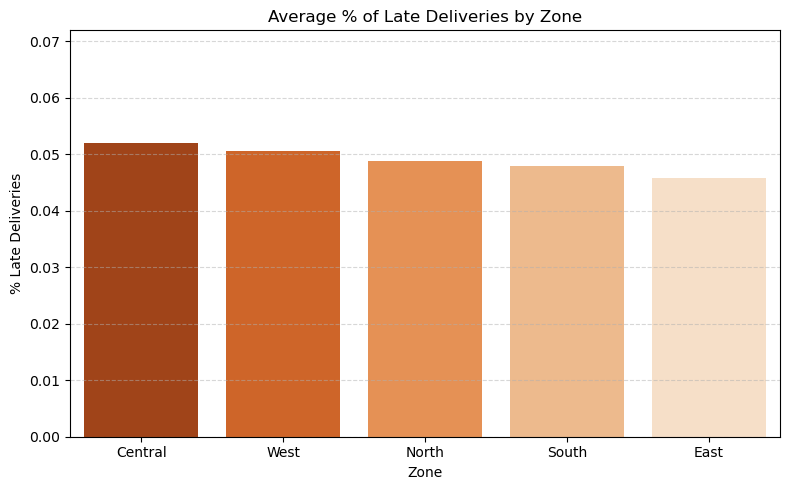

In [79]:
# Visualization: Bar Chart – % Late Deliveries by Zone
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=zone_delay_rate, x='zone', y='is_late', palette='Oranges_r')
plt.title("Average % of Late Deliveries by Zone")
plt.ylabel("% Late Deliveries")
plt.xlabel("Zone")
plt.ylim(0, zone_delay_rate['is_late'].max() + 0.02)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Key Findings
->> Delays are fairly uniform across most zones and days.

->>No zone stands out with significantly poor delivery performance, indicating balanced logistics.

In [ ]:
### 4.3 Agent Performance

#Business Question: 
How are delivery agents performing across different zones?

#Goal: 
Identify top-performing agents and understand how performance varies by zone.

#Tools: 
pandas, groupby, matplotlib/seaborn

In [81]:
# Top 5 Agents by On-Time Percentage
top_agents=agents.sort_values('on_time_pct',ascending=False).head(5)
print(top_agents)

     agent_id assigned_zone  on_time_pct  rating
51   AGNT0052         North        98.93    3.88
153  AGNT0154         North        98.90    3.38
358  AGNT0359         South        98.77    3.42
48   AGNT0049          East        98.72    4.81
255  AGNT0256       Central        98.60    4.42


In [83]:
# Average Rating by Zone
avg_rating_zone=agents.groupby('assigned_zone')['rating'].mean()
print(avg_rating_zone)

assigned_zone
Central    3.951020
East       3.984167
North      3.999426
South      3.884082
West       4.059651
Name: rating, dtype: float64


In [85]:
agents["on_time_pct"] = agents["on_time_pct"] / 100

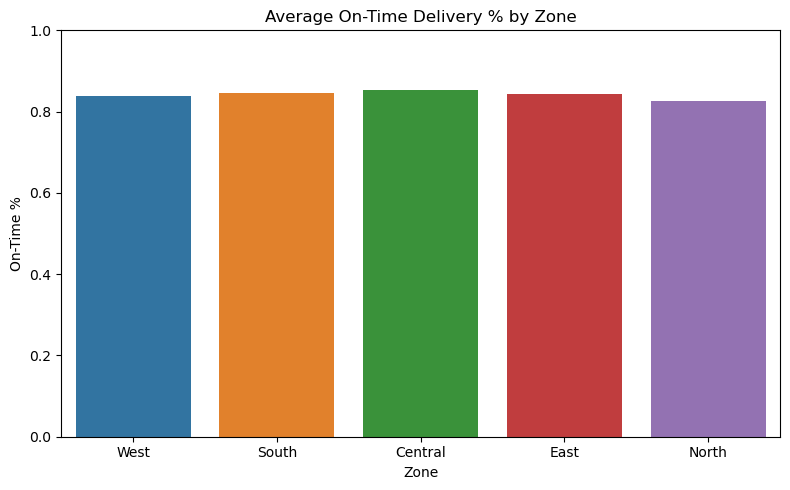

In [87]:
# Visualization – Average On-Time % by Zone
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=agents, x="assigned_zone", y="on_time_pct", estimator='mean', errorbar=None)
plt.title("Average On-Time Delivery % by Zone")
plt.xlabel("Zone")
plt.ylabel("On-Time %")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
# key findings
->> all the TOP 5 PERFORMING AGENTS have 98% on_time_perceentage(with a minimal difference)
->> WEST ZONE has the highest agents rating
    
->> Performed agent performance analysis across zones by calculating the average on-time delivery rate.
Found consistently high on-time percentages (~83%–86%) across all zones

In [ ]:
### 4.4 Weather Impact on Delays

# Business Question: 
Does weather affect delivery times?

# Goal: 
Analyze how different weather conditions impact actual delivery durations.

# Tools: 
pandas, groupby, matplotlib/seaborn

In [93]:
# Group by weather and calculate average delay
avg_weather_delay=orders.groupby('weather_condition')['delay_minutes'].mean().sort_values()
avg_weather_delay

weather_condition
Foggy     5.046149
Windy     5.073645
Rainy     5.075509
Stormy    5.083372
Clear     5.090563
Name: delay_minutes, dtype: float64

In [95]:
# Count number of deliveries by weather type
weather_counts = orders['weather_condition'].value_counts()
print(weather_counts)

weather_condition
Rainy     10130
Windy     10113
Foggy      9951
Clear      9938
Stormy     9868
Name: count, dtype: int64


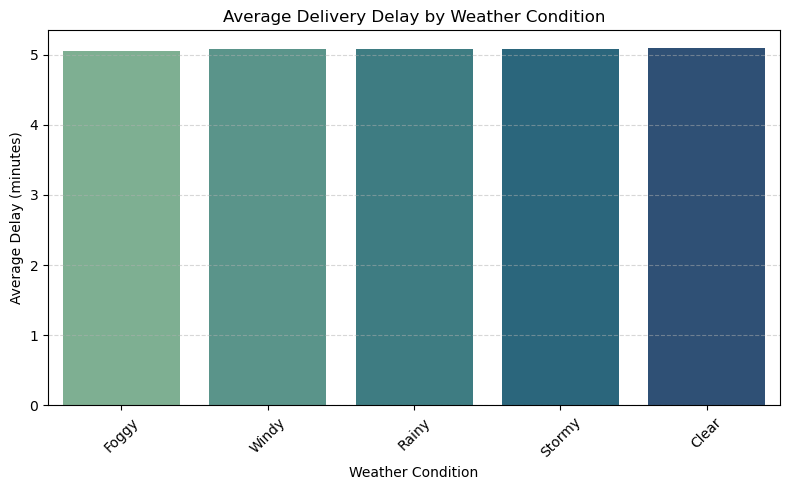

In [97]:
# Plot average delay by weather condition
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_weather_delay.index, y=avg_weather_delay.values, palette="crest")
plt.title('Average Delivery Delay by Weather Condition')
plt.ylabel('Average Delay (minutes)')
plt.xlabel('Weather Condition')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# key findings 
->> In this dataset, the impact of weather on delivery time appears minimal. 
This might be due to limited data variation or pre-emptive measures like re-routing.

However, in real-world logistics, weather (especially rain, fog, or storms) significantly affects delivery

In [ ]:
### 4.5 Customer Order Behavior

# Business Question: 
What does customer ordering behavior look like across different cities?

# Goal: 
Understand where most of the orders come from and identify cities with higher customer engagement.

# Tools: 
pandas, groupby, matplotlib/seaborn

In [103]:
# Count number of customers per city
city_counts=customers['location'].value_counts().reset_index()
city_counts.columns = ['location', 'num_customers']
city_counts

,location,num_customers
0,Central,1024
1,North,1019
2,West,1009
3,East,983
4,South,965


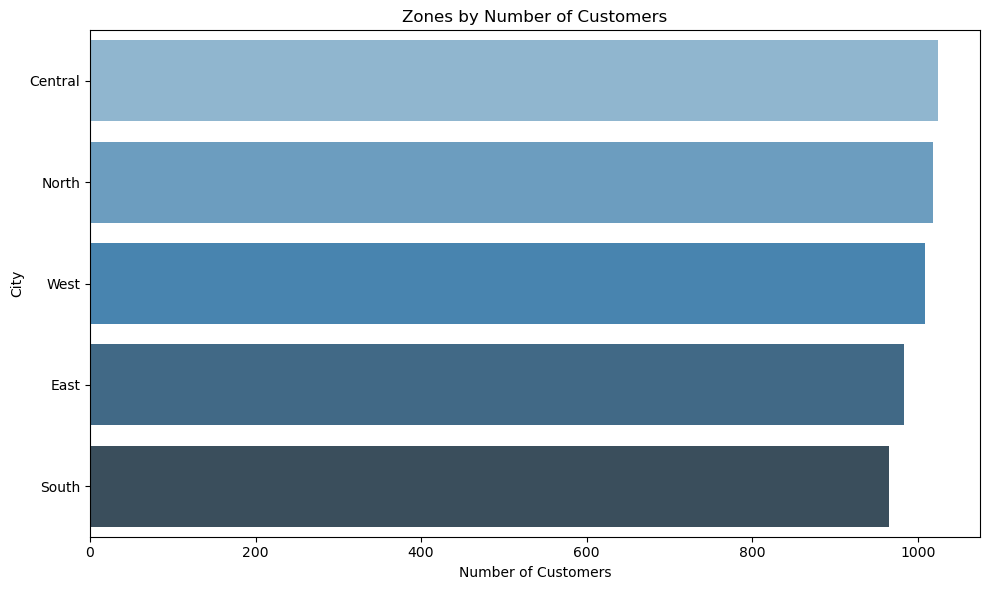

In [105]:
# visualisation of number of customers by zone 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=city_counts.head(10), x='num_customers', y='location', palette='Blues_d')
plt.title('Zones by Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.tight_layout()
plt.show()

In [ ]:
# key findings
->> Zone-wise item counts and values are evenly distributed.

In [ ]:
### 4.6 Time Slot Analysis

#Business Question: 
Do delivery durations and punctuality vary across different times of the day?

#Goal: 
Understand how delivery performance fluctuates by time slots (e.g., morning, afternoon, evening, night)
to optimize agent assignment and resource planning.

#Tools: 
pandas, groupby 

In [111]:
# Creating delivery time slots:
def assign_time_slot(hour):
    if 6 <= hour < 12:
        return 'Morning (6AM–12PM)'
    elif 12 <= hour < 17:
        return 'Afternoon (12PM–5PM)'
    elif 17 <= hour < 21:
        return 'Evening (5PM–9PM)'
    else:
        return 'Night (9PM–6AM)'

deliveries['time_slot'] = deliveries['pickup_hour'].apply(assign_time_slot)

In [113]:
# Group by time slot and analyze
deliveries.groupby('time_slot')['actual_duration_minutes'].mean()

time_slot
Afternoon (12PM–5PM)    13.114119
Evening (5PM–9PM)       13.077275
Morning (6AM–12PM)      13.063082
Night (9PM–6AM)         13.057311
Name: actual_duration_minutes, dtype: float64

In [ ]:
# key findings
->> we dont find much difference in the number of deliveries grouped by time_slot

In [ ]:
# 5 . Next Steps: SQL & Power BI Integration

 Note 
While this Jupyter Notebook demonstrates the Python-based analysis using four core datasets,
I am also integrating SQL and Power BI in the extended phase of this project.

In the upcoming steps:

I will be using all six datasets to build relational models in SQL, write meaningful queries, and extract insights.
I will also be developing interactive Power BI dashboards to visualize key metrics and trends for a more dynamic and business-friendly presentation.

This ensures a complete end-to-end data project workflow—right from raw data to visual reporting.